In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dicti = {'X' : [1,2,3,4,5],
        'Y' : [2,4,5,4,5]}
data = pd.DataFrame(dicti)
data.head()

,X,Y
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


Text(0, 0.5, 'Dependent variable')

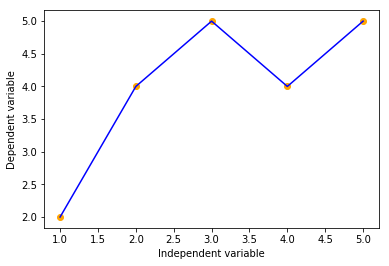

In [3]:
plt.scatter(data['X'],data['Y'],color = 'orange')
plt.plot(data['X'],data['Y'],color = 'blue')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')

In [4]:
X_mean = data['X'].mean()
Y_mean = data['Y'].mean()
print(X_mean)
print(Y_mean)

3.0
4.0


In [5]:
def findings(row,X_mean):
    new_x = row-X_mean
    return new_x
new_x = findings(data['X'],X_mean)
new_y = findings(data['Y'],Y_mean)
data['X-x^'] = new_x
data['Y-y^'] = new_y
data['X-x^2'] = new_x*new_x
data['(X-x^)(Y-y^)'] = new_x*new_y

In [6]:
data.head()

,X,Y,X-x^,Y-y^,X-x^2,(X-x^)(Y-y^)
0,1,2,-2.0,-2.0,4.0,4.0
1,2,4,-1.0,0.0,1.0,-0.0
2,3,5,0.0,1.0,0.0,0.0
3,4,4,1.0,0.0,1.0,0.0
4,5,5,2.0,1.0,4.0,2.0


In [7]:
# regression formula y = b0+b1.x1
# where x1 is independent variable and b1 is calculated using (X-x^)(Y-y^)/X-x^2
b1 = data['(X-x^)(Y-y^)'].mean()/data['X-x^2'].mean()
print(b1)

0.6


In [8]:
b0 = Y_mean - (b1*X_mean)
print(b0)

2.2


In [9]:
def indepndent(x):
    y = b0+(b1*x)
    return y
y = indepndent(data['X'])
data['y_regr'] = y

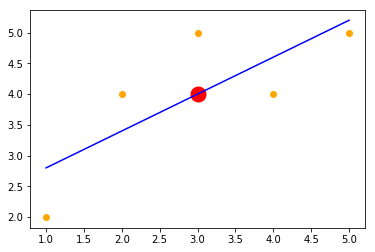

In [10]:
plt.scatter(data['X'],data['Y'],color = 'orange')
plt.plot(data['X'],data['y_regr'],color = 'blue')
plt.scatter(X_mean,Y_mean,color = 'red',linewidths = 10)

In [ ]:
'''' after designing the model we need to confirm how true the predicted values are hence the model produce the true output 
to do this we have some error calculator 
mean absolute error  --> is obtained by calculating absolute difference between the model prediction and true values Yi -YI^/n
1) calculate residual of every datapoint
2)calculate absolute values
3)calculate the average of all values 
MAE = 0 model is perfect ''''

In [13]:
data.head()

,X,Y,X-x^,Y-y^,X-x^2,(X-x^)(Y-y^),y_regr
0,1,2,-2.0,-2.0,4.0,4.0,2.8
1,2,4,-1.0,0.0,1.0,-0.0,3.4
2,3,5,0.0,1.0,0.0,0.0,4.0
3,4,4,1.0,0.0,1.0,0.0,4.6
4,5,5,2.0,1.0,4.0,2.0,5.2


In [16]:
data['MAE'] = data['Y'] - data['y_regr']
data.head()

,X,Y,X-x^,Y-y^,X-x^2,(X-x^)(Y-y^),y_regr,MAE
0,1,2,-2.0,-2.0,4.0,4.0,2.8,-0.8
1,2,4,-1.0,0.0,1.0,-0.0,3.4,0.6
2,3,5,0.0,1.0,0.0,0.0,4.0,1.0
3,4,4,1.0,0.0,1.0,0.0,4.6,-0.6
4,5,5,2.0,1.0,4.0,2.0,5.2,-0.2


In [27]:
value1 = 0
for x in data['MAE']:
    value1 = value1 + x
value2 = value1/len(data['MAE'])
print(value2)
value = len(data['MAE'])
mae = value2/value
print(mae)

-8.881784197001253e-17
-1.7763568394002505e-17
